# single layer perceptron - multilayer perceptron notes

#🧠 Part 1: Single-Layer Perceptron (SLP)

🔍 Concept:

>Simplest form of a neural network.

>Only 1 input layer and 1 output layer (no hidden layers).

>Works well for linearly separable data.

📐 Equation:

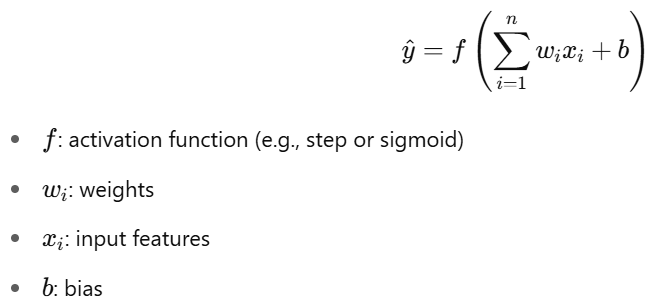

Accuracy: 1.0


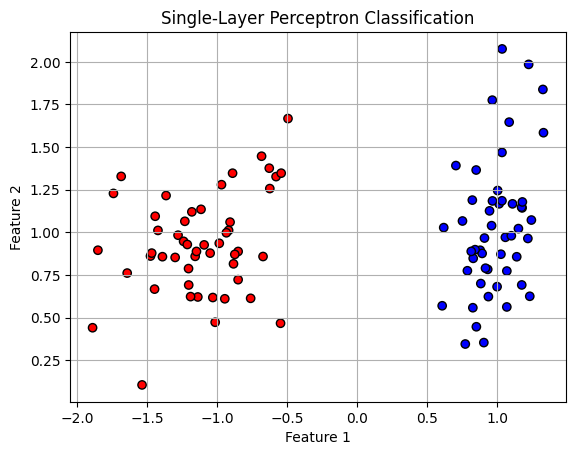

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Generate a simple binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=1)

# Initialize single-layer Perceptron model from sklearn
model = Perceptron(max_iter=1000, eta0=0.01, random_state=0)

# Fit model to data
model.fit(X, y)

# Predict labels
y_pred = model.predict(X)

# Calculate and print accuracy
print("Accuracy:", accuracy_score(y, y_pred))

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Single-Layer Perceptron Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


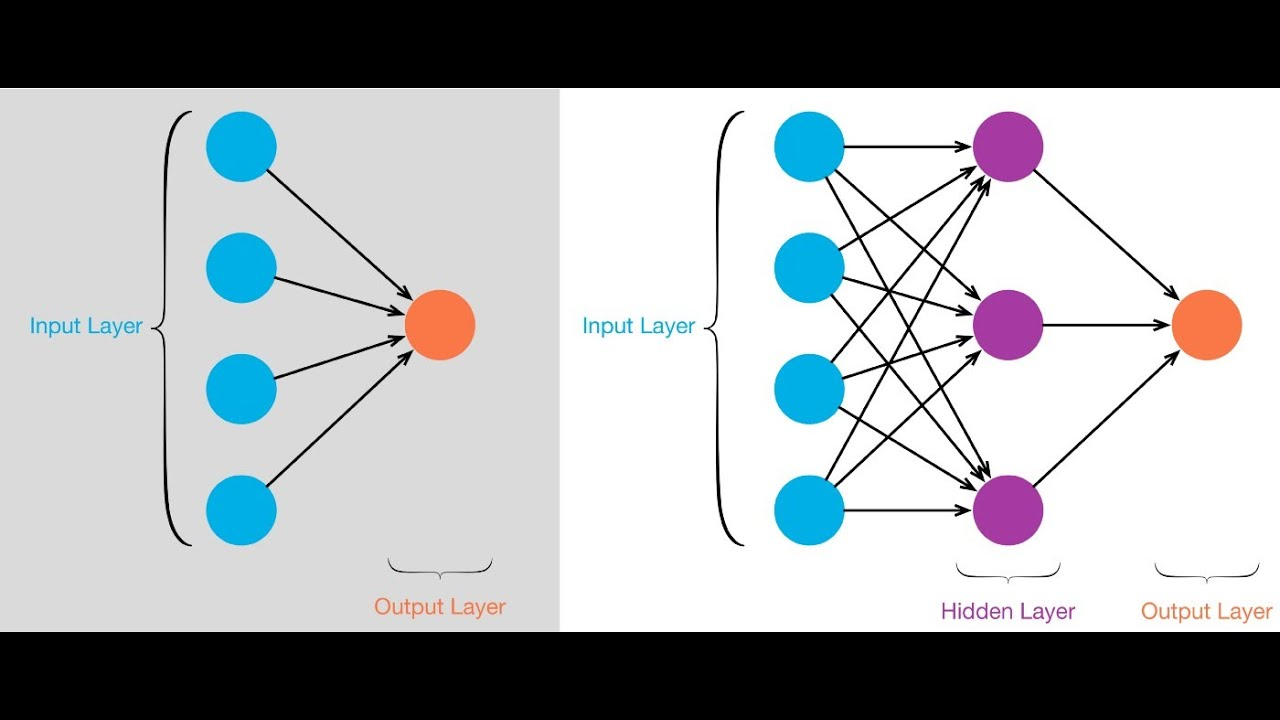

#🧠 Part 2: Multi-Layer Perceptron (MLP)
🔍 Concept:

>Consists of input, hidden, and output layers.

>Uses non-linear activation functions.

>Can model non-linear relationships.

📐 Equation:

For one hidden layer:

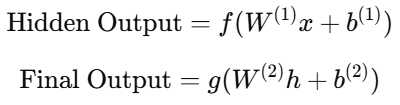

In [2]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Create non-linear dataset (not linearly separable)
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create MLP model using Keras Sequential API
model = Sequential()
# Input layer with 2 inputs → Hidden layer with 10 neurons and ReLU activation
model.add(Dense(10, input_shape=(2,), activation='relu'))
# Output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary crossentropy and Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for 100 epochs
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8617 - loss: 0.2704
Test Accuracy: 0.8600000143051147


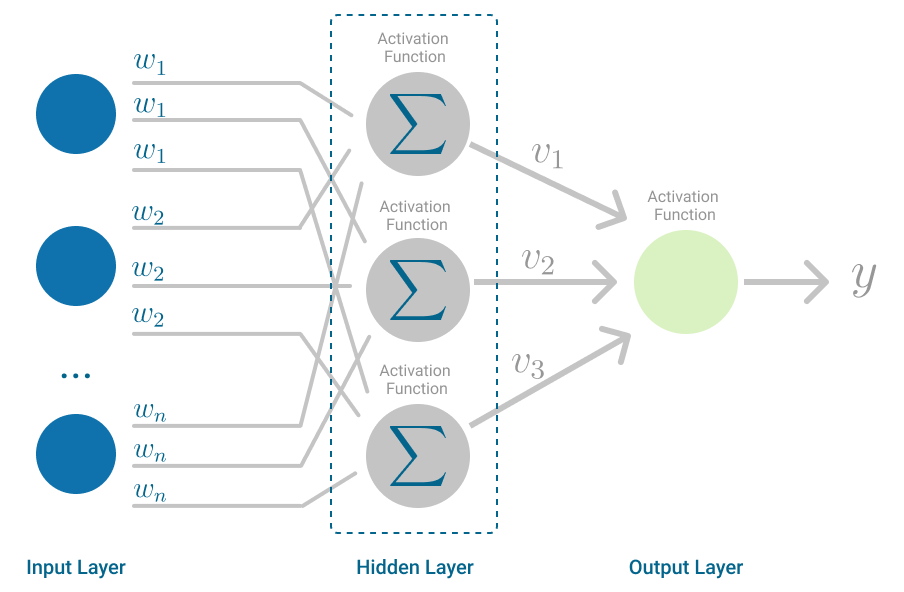

#📈 Plotting Training Progress

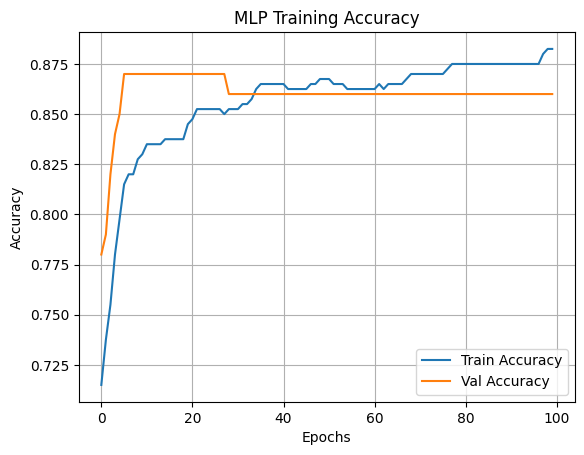

In [3]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("MLP Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()



#✅ Summary Table

| Model | Layers | Activation   | Use Case          | Keras Support              |
| ----- | ------ | ------------ | ----------------- | -------------------------- |
| SLP   | 1      | Step/Sigmoid | Linear separation | ❌ (manual or sklearn only) |
| MLP   | ≥2     | ReLU/Sigmoid | Non-linear        | ✅ Fully supported          |
